# Python プロ野球データ分析

Atsutya Kobayashi 2018-08-12

---

### index

- 1. [`Numpy/Pandas`でのデータ構造など](#sec1)


- 2. [`Matplotlib`/`seaborn`/`plotly`でのデータの可視化：変数間の関係性の俯瞰](#sec2)


- 3. [`Numpy`での単回帰分析](#sec3)


- 4. [`scikit-learn`での多変量解析：変数選択，モデル選択](#sec4)


- 5. [GLM(一般化線形モデル)，正則化，Ridge/Lasso/erastic netによる勝率予想](#sec5)


- 6. [SVM(サポートベクターマシン)による分類(SVC)，交差検証，評価，可視化](#sec6)


- 7. [ランダムフォレストによる分類，可視化](#sec7)


- 8. [ニューラルネットワーク (パーセプトロン，MLP，DL)](#sec8)


- 9. [`TensorFlow`による深層学習モデル構築 ](#sec9)

---

#### References/Documentations

- [Numpy/Scipy](https://docs.scipy.org/doc/)
- [Pandas](https://pandas.pydata.org/)
- [matplotlib.pyplot](https://matplotlib.org/api/pyplot_summary.html)
- [scikit-learn](http://scikit-learn.org/stable/index.html)
- [tensorflow](https://www.tensorflow.org/)

---

#### About Data

`getNPB.py` : NPBの公式サイトのデータ (http://npb.jp/bis/yearly/) からシーズンプロ野球データを取得するプログラム(3系)．`BeautifulSoup4`と`requests`を用いて作成した。引数に年を入れるとその年のチーム毎の結果を返す．引数に何も指定しなかった場合は，1950年から2017年までのデータを全て取得し，`central_league.txt`と`pacific_league.txt`を出力する。

---

<span id="sec1"></span>  

## 1. Numpy/Pandasでのデータ確認

`.csv`データを読み込み，ベクトルデータとして扱う。

In [1]:
%ls

central_league.csv              output_41_1.png
centralleague_withsave.csv      output_42_1.png
download.png                    pacific_league.csv
getNPB.py                       pacificleague.csv
output_32_0.png                 pacificleague_withsave.csv
output_34_1.png                 python-baseball-analysis.ipynb
output_36_0.png                 python-baseball-analysis.md
output_39_1.png                 var/


データのCSVが用意されているので，`Pandas`で読み込んで見る。

In [2]:
# typical
import numpy as np
import pandas as pd

# module for progress-bar
from tqdm import tqdm_notebook

# ignore insignificant warnings
import warnings
warnings.filterwarnings('ignore')

モジュールをインポート。

In [3]:
# set visible max columns = 50
pd.set_option('display.max_columns', 50)

列の表示が途中で省略されてしまうので，最大表示列数を50まで上げておく。

In [4]:
# read csv data as Pandas.DataFrame
data_pacific = pd.read_csv("./pacific_league.csv")
data_central = pd.read_csv("./central_league.csv")

print("pacific league data ,size is {}".format(data_pacific.shape))
print("central league data ,size is {}".format(data_central.shape))

"data imported!"

pacific league data ,size is (831, 22)
central league data ,size is (412, 22)


'data imported!'

上記がセ／パ両リーグの，**1950年~2017年**のシーズンデータ。

---

### 各変数の説明

`pandas.DataFrame.columns`で列のラベル，データ・タイプを取得可能。

In [5]:
# get columns data(tuple)
# for i in data_central.columns: 
#   print(i)

data_central.columns.values

array(['Year', 'League', 'Rank', 'Team', 'All-Games', 'Win', 'Lose',
       'Draw', 'Win-Prob', 'Batting-Average', 'Bats', 'Points', 'Hits',
       'Double', 'Triple', 'HR', 'RBI', 'Steal', 'Protection-Ratio',
       'Whole-Pitch', 'Strike-Outs', 'Lost-Points'], dtype=object)

データの内容は，  

- Year : シーズン年度
- League : セ／パ
- Rank : シーズン順位
- Team : チーム名
- All-Games : 試合数
- Win : 勝利数
- Lose : 敗北数
- Draw : 引き分け数
- Win-Prob : 最終勝率
- Batting-Average : チーム打率
- Bats : チーム打数
- Points : チーム得点数
- Hits : チーム安打数
- Double : チーム二塁打数
- Triple : チーム三塁打数
- HR : チームホームラン数
- RBI : チーム打点数
- Steal : チーム盗塁数
- Protection-Ratio : チーム防御率
- Whole-Pitch : チーム完投数
- Strike-Outs : チーム脱三振数
- Lost-Points : チーム失点数


---

### セ・パ両データを結合


セ・リーグとパ・リーグのデータを結合し，チーム一覧も表示する。

In [6]:
# integrate both leagues data
data_all = data_central.append(data_pacific).sort_values(["Year","Rank"]).drop_duplicates()


print(data_all.drop_duplicates().shape)

data_all["Team"].unique()

(831, 22)


array(['松竹ロビンス', '毎日オリオンズ', '中日ドラゴンズ', '南海ホークス', '読売ジャイアンツ', '大映スターズ',
       '大阪タイガース', '阪急ブレーブス', '大洋ホエールズ', '西鉄クリッパース', '西日本パイレーツ',
       '東急フライヤーズ', '国鉄スワローズ', '近鉄パールス', '広島カープ', '名古屋ドラゴンズ', '西鉄ライオンズ',
       '大洋松竹ロビンス', '高橋ユニオンズ', '東映フライヤーズ', 'トンボユニオンズ', '大映ユニオンズ',
       '毎日大映オリオンズ', '近鉄バファロー', '阪神タイガース', '近鉄バファローズ', '東京オリオンズ',
       'サンケイスワローズ', 'サンケイアトムズ', '広島東洋カープ', 'ロッテ・オリオンズ', 'アトムズ',
       'ヤクルトアトムズ', '太平洋クラブ・ライオンズ', '日拓ホーム・フライヤーズ', 'ヤクルトスワローズ',
       '日本ハム・ファイターズ', 'クラウンライター・ライオンズ', '横浜大洋ホエールズ', '西武ライオンズ',
       'オリックス・ブレーブス', '福岡ダイエーホークス', 'オリックス・ブルーウェーブ', '千葉ロッテマリーンズ',
       '横浜ベイスターズ', '大阪近鉄バファローズ', '北海道日本ハムファイターズ', '福岡ソフトバンクホークス',
       'オリックス・バファローズ', '東北楽天ゴールデンイーグルス', '東京ヤクルトスワローズ', '埼玉西武ライオンズ',
       '横浜DeNAベイスターズ'], dtype=object)

---

### 各データについてソート

- `.head(n)` で上からn項目を取得


- `.tail(n)` で下からn項目を取得


- `pandas.DataFrame.sort_values`[(ドキュメント)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) を用いて，ソート。


In [7]:
data_all.head(3)

,Year,League,Rank,Team,All-Games,Win,Lose,Draw,Win-Prob,Batting-Average,Bats,Points,Hits,Double,Triple,HR,RBI,Steal,Protection-Ratio,Whole-Pitch,Strike-Outs,Lost-Points
5,1950,central,1,松竹ロビンス,137,98,35,4,0.737,0.287,4939,908,1417,179,49,179,825,223,3.23,71,438,524
415,1950,pacific,1,毎日オリオンズ,120,81,34,5,0.704,0.286,4245,713,1212,209,43,124,640,195,3.42,58,462,512
0,1950,central,2,中日ドラゴンズ,137,89,44,4,0.669,0.274,4787,745,1311,229,54,144,693,179,3.73,72,558,597


In [8]:
data_all.tail(3)

,Year,League,Rank,Team,All-Games,Win,Lose,Draw,Win-Prob,Batting-Average,Bats,Points,Hits,Double,Triple,HR,RBI,Steal,Protection-Ratio,Whole-Pitch,Strike-Outs,Lost-Points
826,2017,pacific,5,北海道日本ハムファイターズ,143,60,83,0,0.420,0.242,4749,509,1147,189,18,108,482,86,3.82,6,968,596
408,2017,central,6,東京ヤクルトスワローズ,143,45,96,2,0.319,0.234,4728,473,1108,166,19,95,449,50,4.21,6,1011,653
827,2017,pacific,6,千葉ロッテマリーンズ,143,54,87,2,0.383,0.233,4718,479,1098,215,29,95,455,78,4.22,11,939,647


In [9]:
print("勝率TOP3")
display(data_all.sort_values(
    ["Win-Prob"], ascending=False, kind="quicksort").head(3))

print("打率TOP3")
display(data_all.sort_values(
    ["Batting-Average"], ascending=False, kind="quicksort").head(3))

print("防御率TOP3")
display(data_all.sort_values(
    ["Protection-Ratio"], ascending=True, kind="quicksort").head(3))

print("シーズン得点TOP3")
display(data_all.sort_values(
    ["Points"], ascending=False, kind="quicksort").head(3))

勝率TOP3


,Year,League,Rank,Team,All-Games,Win,Lose,Draw,Win-Prob,Batting-Average,Bats,Points,Hits,Double,Triple,HR,RBI,Steal,Protection-Ratio,Whole-Pitch,Strike-Outs,Lost-Points
419,1951,pacific,1,南海ホークス,104,72,24,8,0.750,0.276,3660,496,1010,152,45,48,441,191,2.40,36,376,322
5,1950,central,1,松竹ロビンス,137,98,35,4,0.737,0.287,4939,908,1417,179,49,179,825,223,3.23,71,438,524
14,1951,central,1,読売ジャイアンツ,114,79,29,6,0.731,0.291,3950,702,1151,191,34,92,632,192,2.62,63,436,381


打率TOP3


,Year,League,Rank,Team,All-Games,Win,Lose,Draw,Win-Prob,Batting-Average,Bats,Points,Hits,Double,Triple,HR,RBI,Steal,Protection-Ratio,Whole-Pitch,Strike-Outs,Lost-Points
745,2003,pacific,1,福岡ダイエーホークス,140,82,55,3,0.599,0.297,4926,822,1461,276,33,154,794,147,3.94,26,1126,588
301,1999,central,3,横浜ベイスターズ,135,71,64,0,0.526,0.294,4788,711,1408,246,20,140,688,74,4.44,15,868,639
751,2004,pacific,2,福岡ダイエーホークス,133,77,52,4,0.597,0.292,4654,739,1359,244,28,183,706,84,4.58,19,923,651


防御率TOP3


,Year,League,Rank,Team,All-Games,Win,Lose,Draw,Win-Prob,Batting-Average,Bats,Points,Hits,Double,Triple,HR,RBI,Steal,Protection-Ratio,Whole-Pitch,Strike-Outs,Lost-Points
39,1955,central,1,読売ジャイアンツ,130,92,37,1,0.713,0.266,4436,579,1179,156,38,84,540,133,1.75,61,635,291
43,1956,central,2,大阪タイガース,130,79,50,1,0.612,0.224,4240,386,950,149,44,54,341,165,1.77,31,665,283
460,1956,pacific,1,西鉄ライオンズ,154,96,51,7,0.646,0.254,5075,611,1288,213,56,95,567,165,1.87,42,902,372


シーズン得点TOP3


,Year,League,Rank,Team,All-Games,Win,Lose,Draw,Win-Prob,Batting-Average,Bats,Points,Hits,Double,Triple,HR,RBI,Steal,Protection-Ratio,Whole-Pitch,Strike-Outs,Lost-Points
5,1950,central,1,松竹ロビンス,137,98,35,4,0.737,0.287,4939,908,1417,179,49,179,825,223,3.23,71,438,524
745,2003,pacific,1,福岡ダイエーホークス,140,82,55,3,0.599,0.297,4926,822,1461,276,33,154,794,147,3.94,26,1126,588
607,1980,pacific,1,近鉄バファローズ,130,68,54,8,0.557,0.290,4488,791,1301,203,14,239,764,85,4.96,50,609,694


なんかセリーグのcsvデータが重複して2こずつになってたので`pandas.DataFrame.drop_duplicates()`で削除。

`Single : 単打数`を追加し，`loc`[(document)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)で列名指定して順番を入れ替える。

In [10]:
# add column "Singles" data, counting the num of single hits
data_all["Singles"] = data_all["Hits"] \
- (data_all["Double"] + data_all["Triple"] + data_all["HR"])

# check data mat size
print(data_all.shape)

# change columns order set "Singles" col between "Hits" and "Doubles"
data_all = data_all.loc[:,['Year','Team', 'League', 'Rank', 
                           'All-Games', 'Win', 'Lose',
                           'Draw', 'Win-Prob', 'Batting-Average', 
                           'Bats', 'Points', 'Hits', 'Singles',
                           'Double', 'Triple', 'HR', 'RBI', 'Steal', 
                           'Protection-Ratio','Whole-Pitch', 
                           'Strike-Outs', 'Lost-Points']]

# view top 5 rows
data_all.head(5)

(831, 23)


,Year,Team,League,Rank,All-Games,Win,Lose,Draw,Win-Prob,Batting-Average,Bats,Points,Hits,Singles,Double,Triple,HR,RBI,Steal,Protection-Ratio,Whole-Pitch,Strike-Outs,Lost-Points
5,1950,松竹ロビンス,central,1,137,98,35,4,0.737,0.287,4939,908,1417,1010,179,49,179,825,223,3.23,71,438,524
415,1950,毎日オリオンズ,pacific,1,120,81,34,5,0.704,0.286,4245,713,1212,836,209,43,124,640,195,3.42,58,462,512
0,1950,中日ドラゴンズ,central,2,137,89,44,4,0.669,0.274,4787,745,1311,884,229,54,144,693,179,3.73,72,558,597
412,1950,南海ホークス,pacific,2,120,66,49,5,0.574,0.279,4232,645,1181,839,211,43,88,583,225,3.38,38,469,495
7,1950,読売ジャイアンツ,central,3,140,82,54,4,0.603,0.268,4831,724,1297,936,208,27,126,673,212,2.90,89,632,522


これである程度は，pandas.dataframeをキレイにした気がする。

---

<span id="sec2"></span>  



## 2. Matplotlib.pyplot でのデータ可視化

Matplotlibのコマンドの意味を理解する最も簡単な方法は、対応する概念の名前を覚えることです。  
今回は以下の事項だけ覚えておきましょう：

- Figure：1枚の図全体 (**複数のプロットを持つことができる**)
- Axes: グリッドとデータ点を持つプロット (≠axis)
- Line: 直線プロット (曲がっているように見えますが、**細かく見ると直線プロットの集積です**)
- Scatter: 散布図プロット
- X/Y axis label: X軸/Y軸のラベル名
- Title: グラフタイトル
- Legend: 凡例 (各線・点の説明あるいは記述)

![](https://matplotlib.org/_images/anatomy1.png)

[ドキュメント](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

いつもの。インポート

In [11]:
# magic
%matplotlib inline
import matplotlib.pyplot as plt

---

#### IPAフォントの導入

まず，IPAフォントを用いて日本語化。　[ブラウザからのダウンロードページ](https://ipafont.ipa.go.jp/old/ipafont/download.html)

In [12]:
import matplotlib
from matplotlib import rc
print(matplotlib.get_cachedir()) # 削除するためのキャッシュの場所を確認

# 使用するフォントはIPAのものに。
font = {'family':'IPAGothic'}
rc('font', **font)

/Users/atsuya/.matplotlib


- on bash

```
$ cd
$ curl -o ipafont.zip http://ipafont.ipa.go.jp/old/ipafont/IPAfont00303.php
$ unzip ipafont.zip
$ mv IPAfont00303/*.ttf ~/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf
$ rm .matplotlib/*.cache
```

これにより日本語が`matplotlib`で使える。はず

---

#### 備考/追記

http://ipafont.ipa.go.jp/old/ipafont/IPAfont00303.php のcurlではダウンロードできなかったので，サイトから`.zip`ファイルを落として該当ディレクトリに`.ttf`ファイルを入れた方がはやい。`~/.jupyter/custom/`を設定している人は，`~/.jupyter/custom/fonts`内に`.ttf`ファイルを入れておく。

#### 出力画像サイズを変更しておく

`matplotlib.pyplot`でのインライン出力イメージが小さいので，設定の変更をしておく。  
また，フォントのサイズも変更しておく。その他，スタイル設定や色設定など変えておく。

In [13]:
plt.style.use('ggplot')
plt.rcParams['ytick.color'] = '111111'
plt.rcParams['xtick.color'] = '111111'
plt.rcParams['axes.labelcolor'] = '111111'
plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['font.size'] = 15

---

### matplotlib.pyplot.plot 基本確認

[ロジスティック関数(標準シグモイド関数)](https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0)をプロットしてみる。

$$y=\frac{1}{(1+e^{-x})}$$

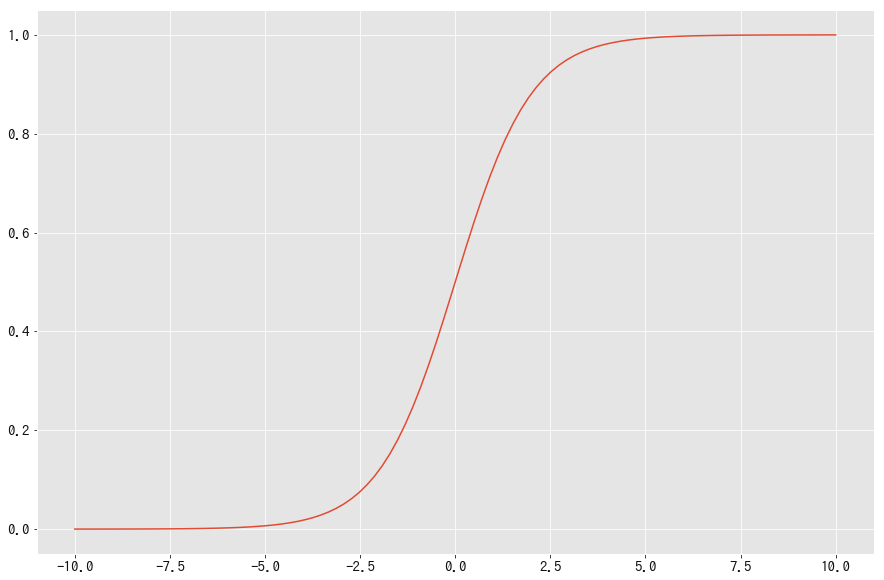

In [14]:
# Casual style
X = np.linspace(-10, 10, 100)  # from -10 to 10, 100 elements
Y = 1/(1+np.exp(-X))

plt.figure()  # init of figure object
plt.plot(X, Y)  # plot
plt.show()  # show

上は簡単な描画の方法なので，`figure`の上に`axis`=軸を乗せ，そこに描画するという本来の書き方(フォーマルな書き方と呼ぶ)で，インボリュートを書いてみる。

$$x = cos\theta + \theta sin\theta$$
$$y = sin\theta + \theta cos\theta$$
$$(-8\pi < \theta < 8\pi)$$

<class 'matplotlib.figure.Figure'>


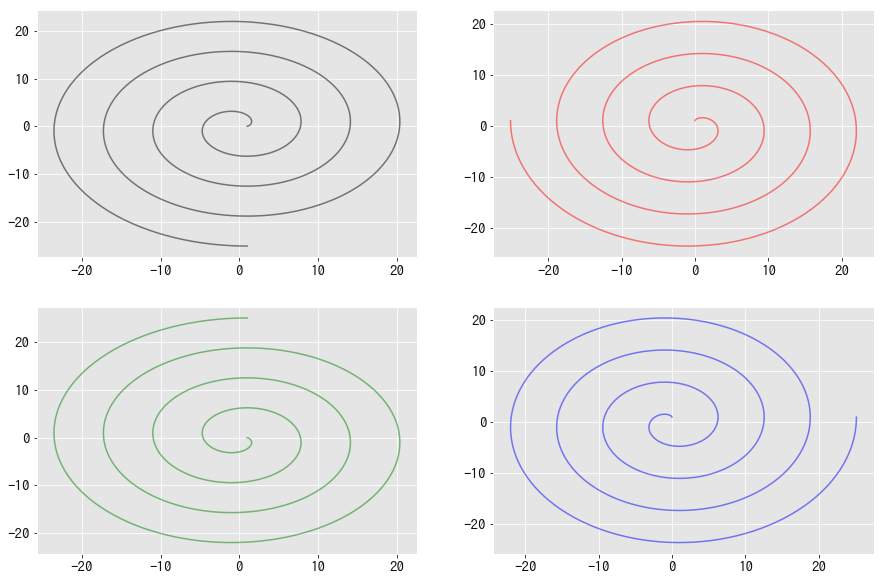

In [15]:
# formal style plotting

d = np.linspace(0, 8*np.pi, 1000) # from 0 to 8π, 1000 elements
d2 = np.linspace(-8*np.pi, 0, 1000) # from -8π to 0, 1000 elements
X = np.cos(d) + d * np.sin(d)
Y = np.sin(d) - d * np.cos(d)
x = np.cos(d2) + d2 * np.sin(d2)
y = np.sin(d2) - d2 * np.cos(d2)

# make figure
fig = plt.figure()
print(type(fig))

# make axis objects
ax = fig.add_subplot(221)  # make 2x2 space=1 axis obj on figure obj
ax.plot(X, Y, alpha=.5, color="black")  # plot on axis obj

ax2 = fig.add_subplot(222)  # make 2x2 space=2 axis obj on figure obj
ax2.plot(Y, X, alpha=.5, color="red")  # plot on axis obj

ax3 = fig.add_subplot(223)  # make 2x2 space=3 axis obj on figure obj
ax3.plot(x, y, alpha=.5, color="green")  # plot on axis obj

ax4 = fig.add_subplot(224)  # make 2x2 space=4 axis obj on figure obj
ax4.plot(y, x, alpha=.5, color="blue")  # plot on axis obj

plt.show()  # show figure

---

### `pandas.DataFrame.plot()` を用いたデータフレームの可視化

`pandas`からダイレクトに利用できる`matplotlib`の機能。

> Default Palameters  
>
> *DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)*

---

#### 描画可能な表タイプ (kind=)

- `line` : line plot (default) = 折れ線グラフ
- `bar` : vertical bar plot = 棒グラフ
- `barh` : horizontal bar plot = 横棒グラフ
- `hist` : histogram = ヒストグラム
- `box` : boxplot = 箱ひげ図
- `kde` : Kernel Density Estimation plot = カーネル密度推定
- `density` : same as ‘kde’ = カーネル密度推定
- `area` : area plot = エリア:色を塗った折れ線のような
- `pie` : pie plot = 円グラフ
- `scatter` : scatter plot = 散布図
- `hexbin` : hexbin plot = ビン散布:密度を色で

`DataFrame`の1次元版みたいなヤツ，各一つのlabelを抜き出し`pandas.Series`型にして，
折れ線グラフを書いてみる。

---

#### Documents

- [`pyplot.plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)


- [`pandas.DataFrame.plot`](http://pandas.pydata.org/pandas-docs/stable//generated/pandas.DataFrame.plot.html)

---

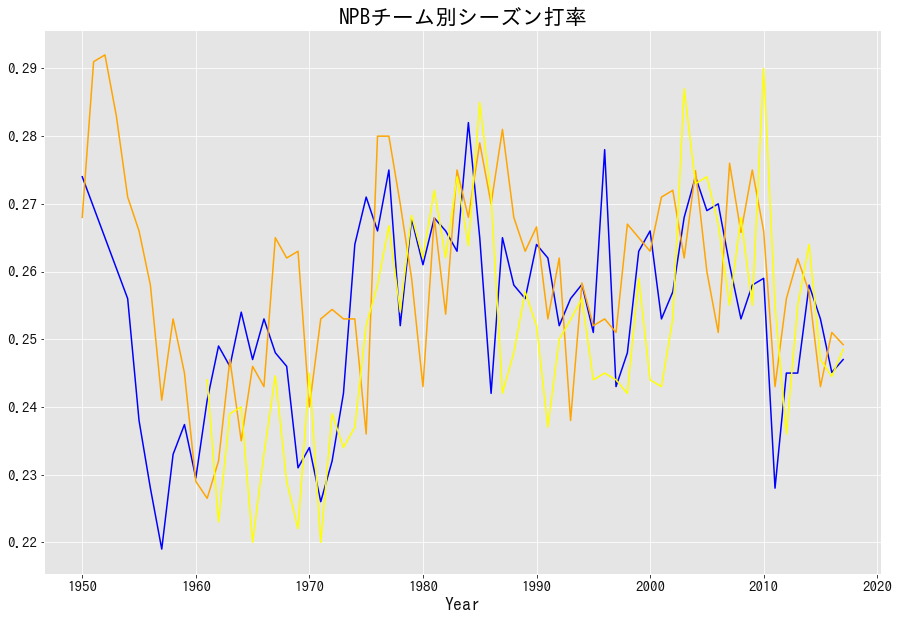

In [16]:
# make specific team Series datas
chunichi_dragons = data_all[(data_all["Team"] == "中日ドラゴンズ")].set_index("Year")
yomiuri_giants = data_all[(data_all["Team"] == "読売ジャイアンツ")].set_index("Year")
hanshin_tigers = data_all[(data_all["Team"] == "阪神タイガース")].set_index("Year")

chunichi_dragons["Batting-Average"].plot(color="blue")
yomiuri_giants["Batting-Average"].plot(color="orange")
hanshin_tigers["Batting-Average"].plot(color="yellow", grid=True, title="NPBチーム別シーズン打率")

plt.show()

`df[df["Label"]=="value"]`により，ラベルの値の真偽の行列に基づいてデータフレームの一部を抜き出せる。  
各チームのデータを抜き出した後，x軸に表示するために年`Year`をインデックスにし，`matplotlib.pyplot.plot()`でプロット。`show()`で表示。

でも，実は`DataFrame`でもそのまま簡単にグラフをかける。

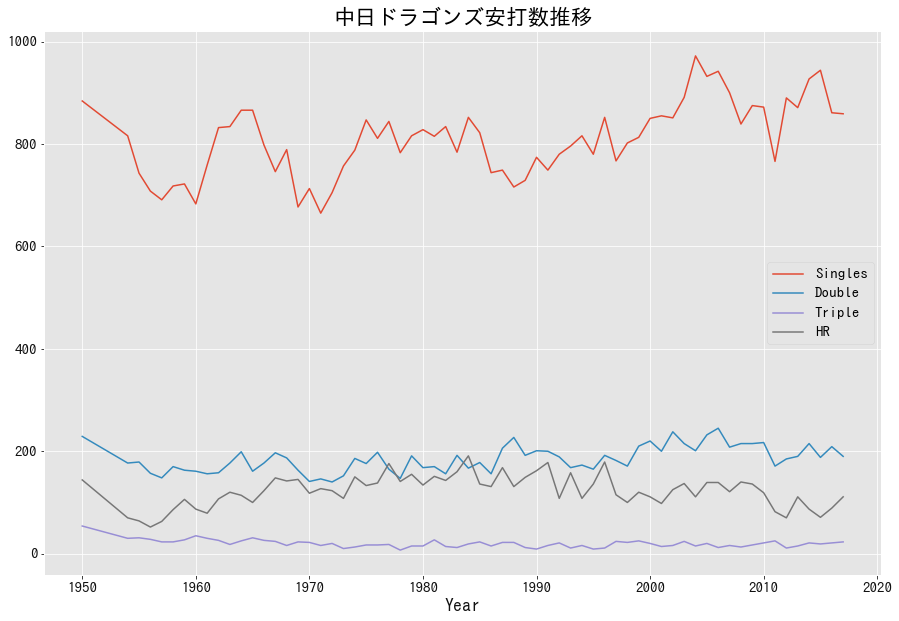

In [17]:
chunichi_dragons.loc[:,
                     ["Singles","Double","Triple","HR"]
                    ].plot(title="中日ドラゴンズ安打数推移",kind="line", grid=True)

---

### 列データにチーム毎の色のデータを追加

プロットの色を変えたいので，pandasのチーム名ごとに色を指定してみる。

`pandas.Series.replace()`を用いる。

> Series.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad', axis=None)[source]

やっぱり，　`pandas.Series.where`のほうがいいかも。

> *Series.where(cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False, raise_on_error=None)*

`where()`で，ブールのリストに基づいた値を`other`に入れ替える。`inplace`で上書きかどうかを指定。ブールのリストは，`Team`に各チーム名(ドラゴンズとか)が含まれているデータのみ`False`になっている。ここでもとデータの上書きやら何やらで小一時間ハマった。

[(参考)](https://deepage.net/features/pandas-where.html)


---

### matplotlib で指定できる色

- [ドキュメント](https://matplotlib.org/examples/color/named_colors.html)

![](https://matplotlib.org/_images/named_colors.png)

---


せっかくなのでfigを横並びにできるよう，([参考](https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-py))`matplotlib.pyplot.subplot`を使い，`matplotlib.pyplot.scatter` を用いて点描してみる。[(ドキュメント)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)

> *matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)[source]*

---

### matplotlib.figure.Figure.add_subplot

フォーマルな方法で描画するときの，`add_subplot()`([ドキュメント](add_subplot()https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot))は，matplotlibのFigureクラスのメソッド。毎回の`fig = plt.figure()`は，コイツのインスタンス生成。

> *class matplotlib.figure.Figure(figsize=None, dpi=None, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tight_layout=None, constrained_layout=None)*

生成した`figure`上の`matplotlib.axes.Axes`オブジェクトは，`matplotlib.axes.Axes.set_title`で様々設定できるらしい。[(ドキュメント)](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_title.html)

> *Axes.set_title(label, fontdict=None, loc='center', pad=None, **kwargs)*

set blue to ドラゴンズ
set darkorange to ジャイアンツ
set gold to タイガース
set navy to ヤクルト
set deepskyblue to ベイスターズ
set red to 広島
set yellow to ホークス
set grey to ファイターズ
set aqua to ライオンズ
set indianred to バファローズ
set black to マリーンズ
set navajowhite to 阪


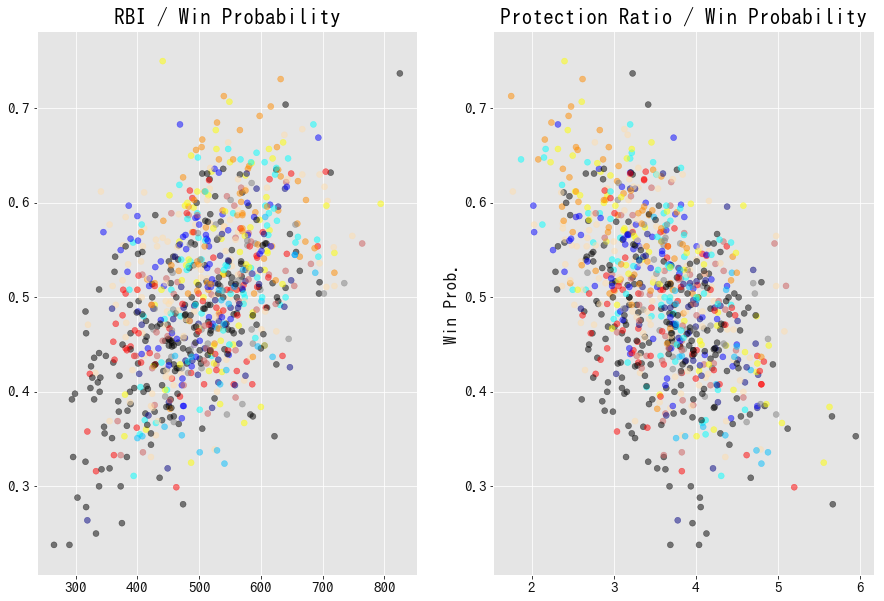

In [18]:
# casual protting
# data_all.plot(title="RBI / Win Probabiloity", x="Win-Prob", y="RBI",kind="scatter",grid=1)
# data_all.plot(title="Protection Ratio / Win Probabiloity" ,x="Win-Prob", y="Protection-Ratio",kind="scatter",grid=1)

# formal plotting
fig = plt.figure(edgecolor="k")

# add a column for colors
data_all["color"] = ["black"] * data_all.Team.size # 1 x 831

def team2color(t, col):
    
    bool_list = ~data_all.Team.str.contains(t) # inverse T/F with tilde
    # renew
    data_all["color"].where(cond=bool_list, other=col, inplace=True)
    print("set {} to {}".format(col, t))

# central league
team2color("ドラゴンズ","blue")
team2color("ジャイアンツ","darkorange")
team2color("タイガース","gold")
team2color("ヤクルト","navy")
team2color("ベイスターズ","deepskyblue")
team2color("広島","red")

# pacific league
team2color("ホークス","yellow")
team2color("ファイターズ","grey")
team2color("ライオンズ","aqua")
team2color("バファローズ","indianred")
team2color("マリーンズ","black")
team2color("阪","navajowhite")

# plotting on subplot objs

ax_l = fig.add_subplot(121) # add axis on 1st space of 1x2 figure
ax_l.scatter(x=data_all["RBI"], y=data_all["Win-Prob"],
              c=data_all["color"], alpha=.5
             )
# by setting data_all.color to parameter "c", set team color on each plots

# set title on left axis obj (ax_l)
ax_l.set_title(label="RBI / Win Probability")

ax_r = fig.add_subplot(122) # add axis on 2nd space of 1x2 figure
ax_r.scatter(x=data_all["Protection-Ratio"], y=data_all["Win-Prob"], 
             c=data_all["color"], alpha=.5
            )
# by setting data_all.color to parameter "c", set team color on each plots

# set title on right axis obj (ax_r)
ax_r.set_title(label="Protection Ratio / Win Probability")

plt.ylabel("Win Prob.")

fig.show()

#### 追記 2018-08-16

データフレームオブジェクトへの列データ追加の操作で，

```
data_all.color = ["black"] * data_all.Team.size # 1 x 831
print(type(data_all.color))

>> <class 'pandas.core.series.Series'>
```

としたところ，`data_all.color`はリスト型になってしまった。

```
data_all["color"] = ["black"] * data_all.Team.size # 1 x 831
print(type(data_all["color"]))
>> <class 'pandas.core.series.Series'>
```

としら，きちんと`data_all["color"]`で`series`型のデータを抽出できた。

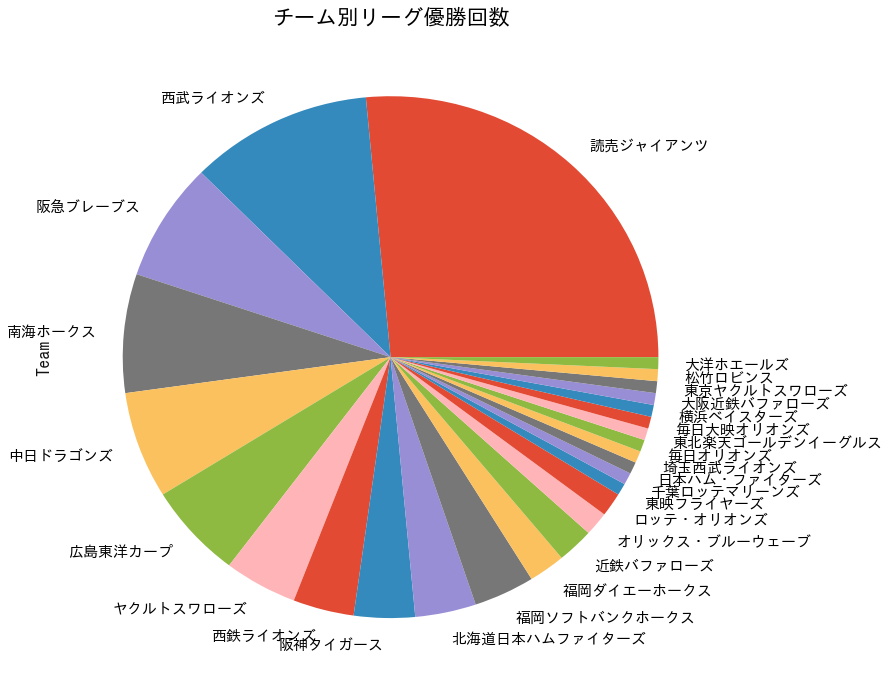

In [19]:
data_all[(data_all["Rank"] == 1)]["Team"].value_counts()\
.plot(kind="pie", figsize=(12,12), title="チーム別リーグ優勝回数")

---

### seaborn

`seaborn`も用いて，**対散布行列**を描画してみる。

---

`seaborn.pairplot` [ドキュメント](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

> *seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)*

- seabornでは同変数同士のプロットはヒストグラムに。
- `hue=`で変数の各種類を指定できる。ここではチーム毎に分けてプロットしている。
- `vars`で使用するデータフレーム内の変数を指定できる。


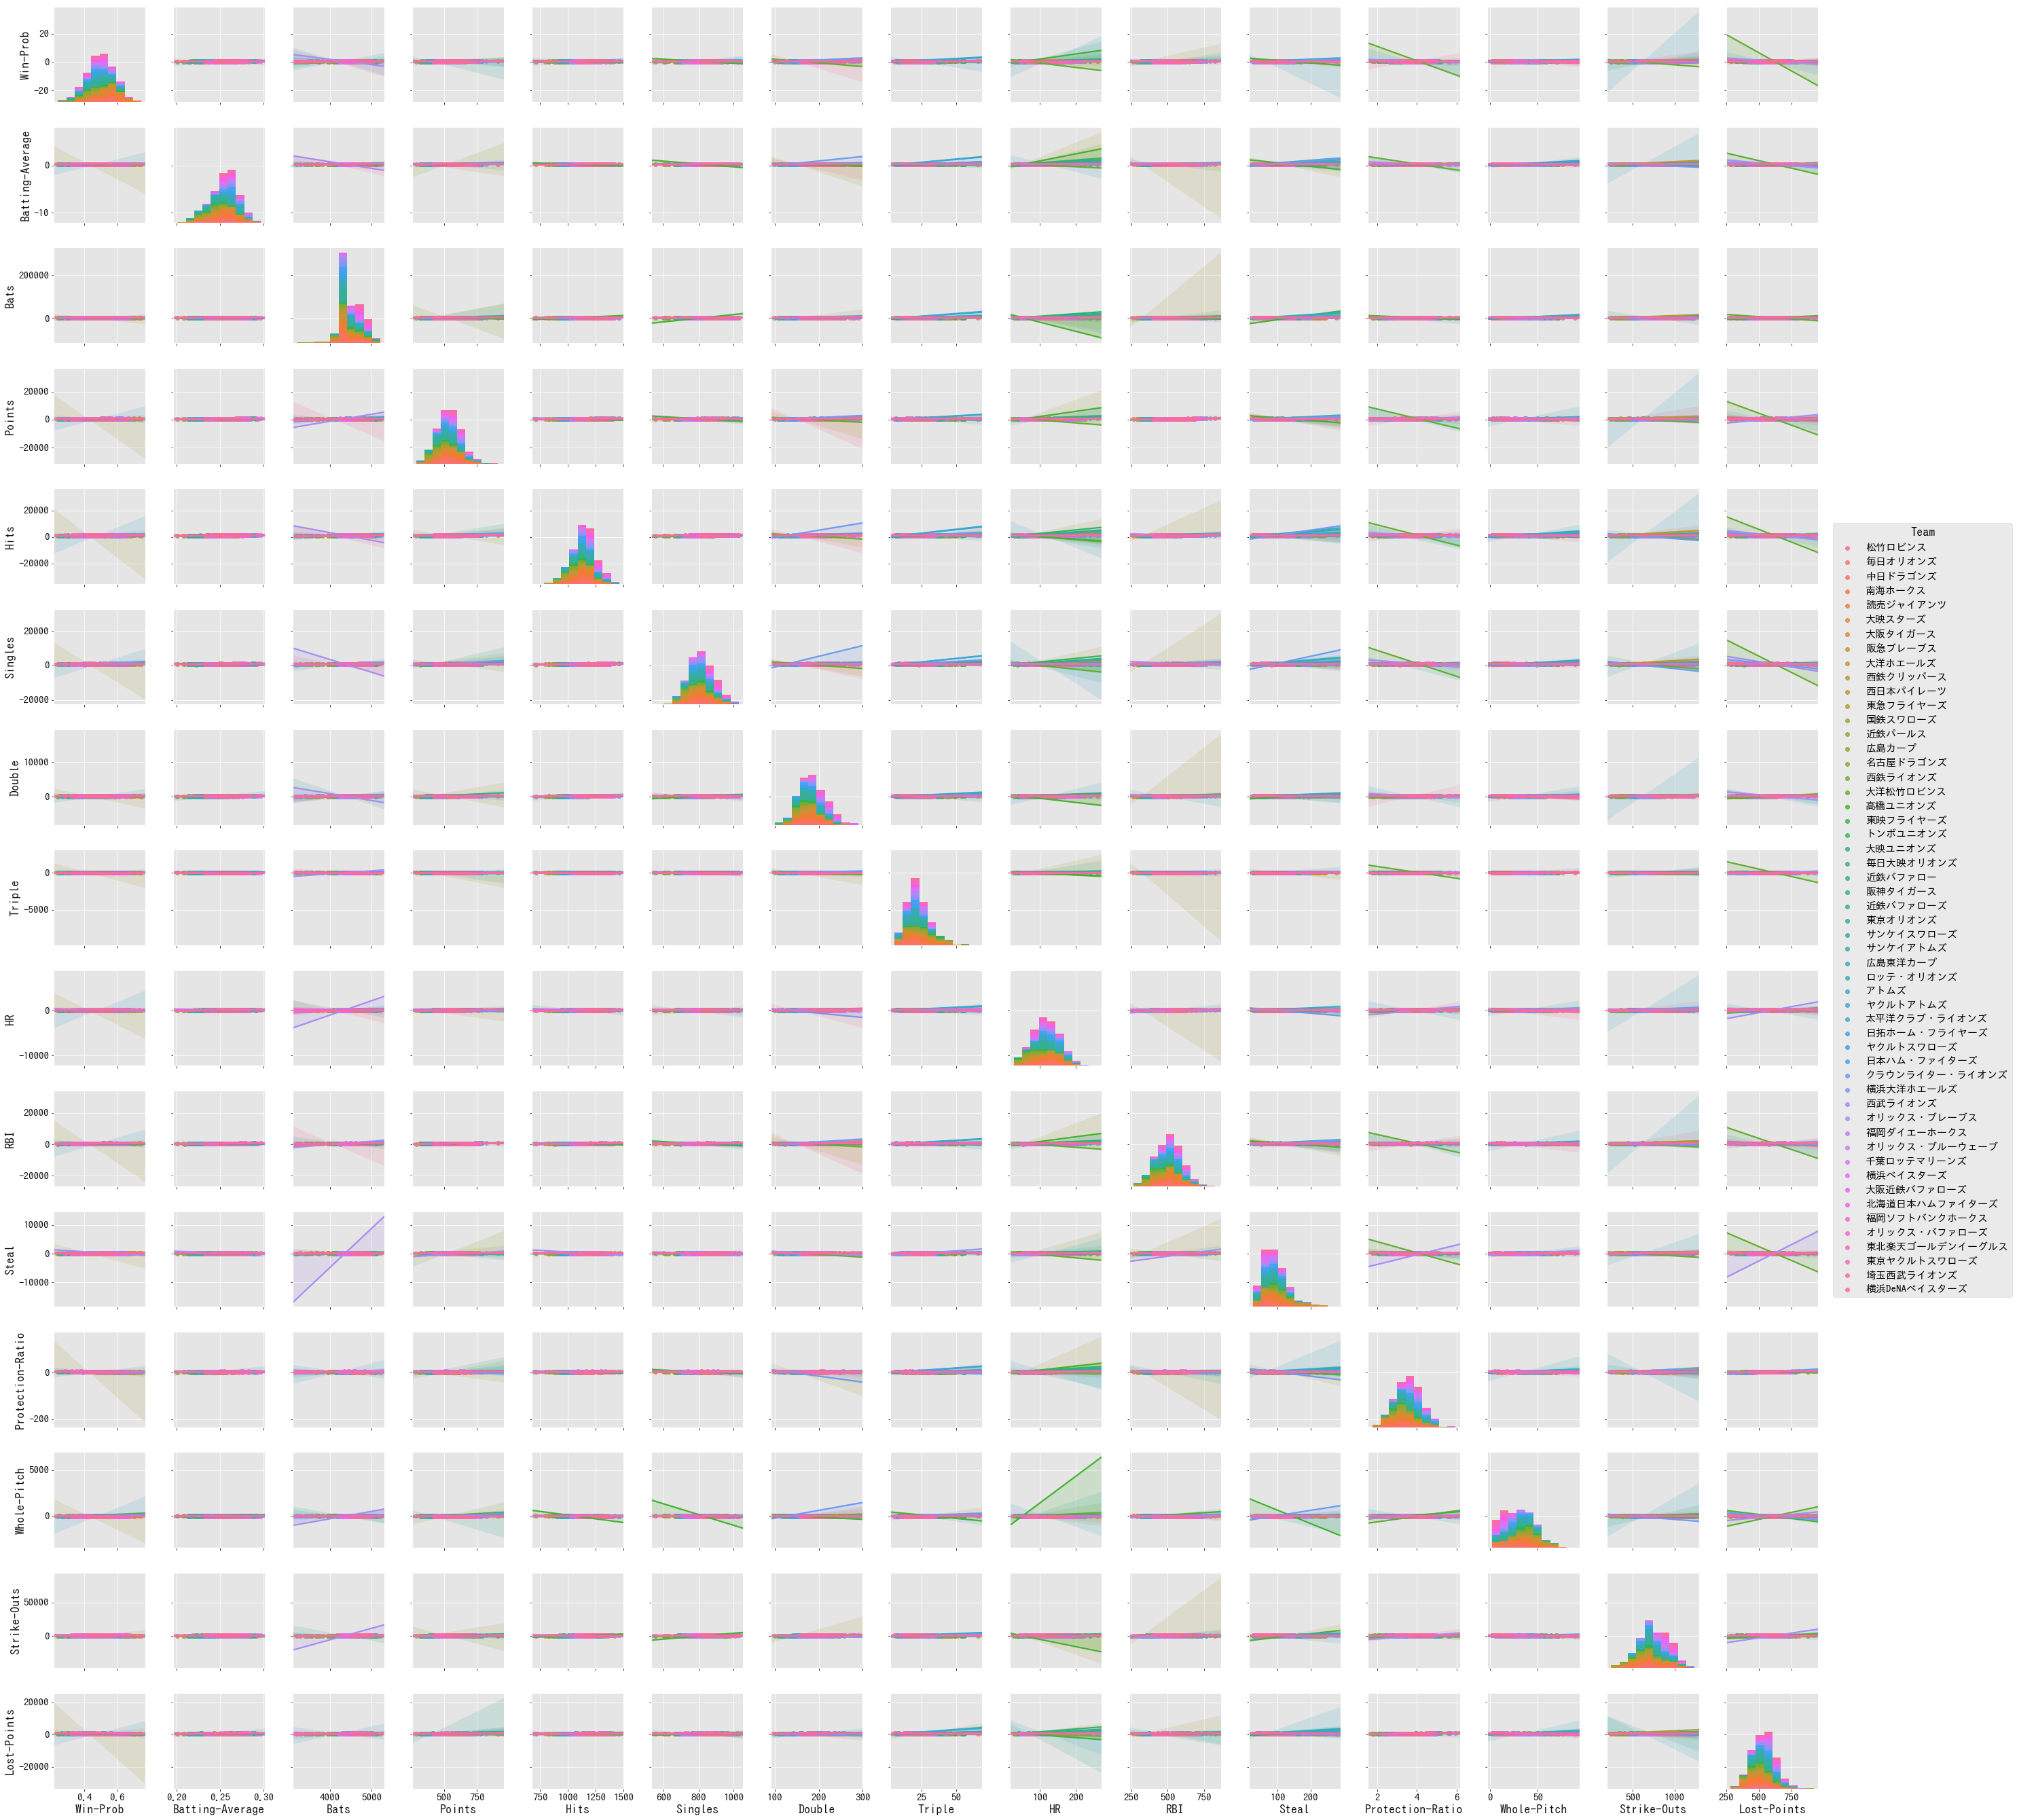

In [20]:
import seaborn as sns

sns.pairplot(data_all, hue="Team", size=2.5, kind="reg",vars=['Win-Prob', 'Batting-Average', 
                           'Bats', 'Points', 'Hits', 'Singles',
                           'Double', 'Triple', 'HR', 'RBI', 'Steal', 
                           'Protection-Ratio','Whole-Pitch', 
                           'Strike-Outs', 'Lost-Points'])
plt.show()

※ダブルクリックで拡大

---

### plotly とかいうライブラリ

added 2018-08-16

- なんか便利らしいのでつかってみよう。JS連動でJupyterとの相性がいいとか。
[(ドキュメント)](https://plot.ly/python/)

- インストールは[ここ](https://plot.ly/python/getting-started/)から

> Plotly's Python graphing library makes interactive, publication-quality graphs online. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.

```
[3(503)] 00:33:29 atsuya on -bash3.2 at ~
--> pip install plotly
ollecting plotly
  Downloading https://files.pythonhosted.org/packages/38/b0/86f6d2443a64be0e30543065c6839d0e033a41ffb7fa4ad0760ae9c3b534/plotly-3.1.1-py2.py3-none-any.whl (36.9MB)
    100% |████████████████████████████████| 36.9MB 1.3MB/s
```

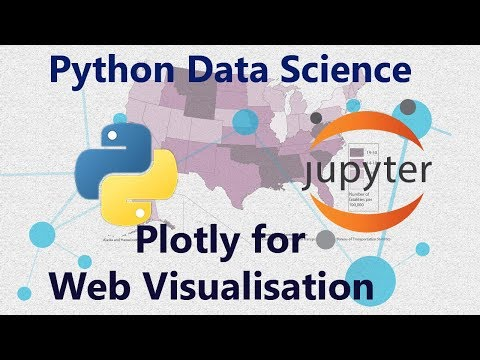

In [21]:
from IPython.display import YouTubeVideo
YouTubeVideo("B911tZFuaOM")

インポートはこうやる。

In [22]:
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='atsuya_jg43yr', api_key='fkscI1aUsqCRA5ScSAYM')

In [23]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [go.Scatter(x=np.arange(-5,5,.1), y=np.arange(-5,5,.1)**3)],
    "layout": go.Layout(title="hello world")
})

ん...？図を触れるぞ...

In [24]:
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api

dragons = data_all[(data_all.Team.str.contains("ドラゴンズ"))]
giants = data_all[(data_all.Team.str.contains("ジャイアンツ"))]

fig = {
    'data': [
  		{
  			'x': dragons["Protection-Ratio"], 
        	'y': dragons["Win-Prob"], 
        	'text': dragons.Year, 
        	'mode': 'markers', 
        	'name': 'Dragons'},
        {
        	'x': giants["Protection-Ratio"], 
        	'y': giants["Win-Prob"], 
        	'text': giants.Year, 
        	'mode': 'markers', 
        	'name': 'Giants'}
    ],
    'layout': {
        'xaxis': {'title': 'Season Protection Ratio'},
        'yaxis': {'title': "Win Probability"}
    }
}

# IPython notebook
plotly.offline.iplot(fig)

おいマジかこれ...やばい

---

<span id="sec3"></span>  



## 3. Numpyでの線形回帰 Linear Regression

[最小二乗法](https://ja.wikipedia.org/wiki/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%97%E6%B3%95) = 正規分布での最尤法による線形回帰を`numpy`でやってみる。


#### `numpy.polyfit`を用いた回帰。[(ドキュメント)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)

> numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)

`polyfit`は，`LSE`(最小二乗法)での多項式フィッティングを行う。

---

$$y = 15x^3 + 5x^2 + 8x + 12$$

が答え。これに`np.random.rand()`でノイズを乗っけた点を，データ$t$とする。

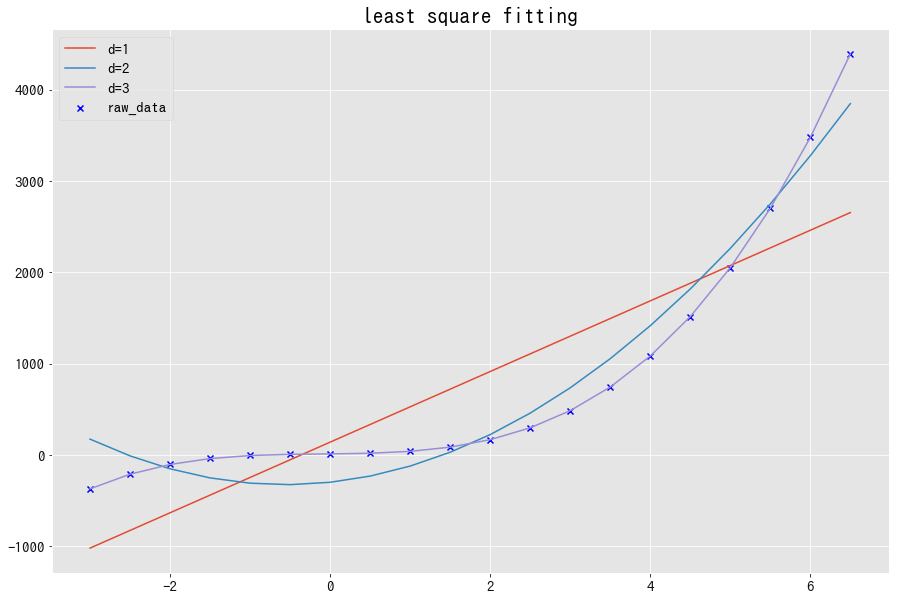

Predictor Functions


1d: 386.88029201524427x + 141.4038235662678

2d: 83.75735173997681x^2 + 93.72956092532566x + -298.32227306861046

3d: 14.986035930995584x^3 + 5.080663102249967x^2 + 7.934505220376353x + 12.450647050409781


In [25]:
# random seed
rnd = np.random.RandomState(0)

# x = predictor variables from -3 to 7, by 0.5
x = np.arange(-3,7,0.5)

# y = response variables with noise
y = 15*x**3 + 5*x**2 + 8*x + 12 + rnd.randn(len(x))

# np.polyfit() returns array of coefficients

# 1d equation linear fitting
coef_1 = np.polyfit(x,y,1) # coefficients
y_pred_1 = coef_1[0]*x + coef_1[1] # fitting function

# 2d equation fitting
coef_2 = np.polyfit(x,y,2) 
y_pred_2 = coef_2[0]*x**2+ coef_2[1]*x + coef_2[2] 

# 3d equation fitting
coef_3 = np.polyfit(x,y,3) 
y_pred_3 = np.poly1d(coef_3)(x) #np.poly1d,求めた係数coef_3を自動で式に当てはめる。

#描画

plt.scatter(x,y,label="raw_data",marker="x",color="blue") # variables data
plt.plot(x,y_pred_1,label="d=1") # 1d equation linear fitting
plt.plot(x,y_pred_2,label="d=2") # 2d equation fitting
plt.plot(x,y_pred_3,label = "d=3") # 3d equation fitting
plt.legend(loc="upper left")
plt.title("least square fitting")
plt.show()

print("Predictor Functions\n")
print("\n1d: {}x + {}".format(coef_1[0],coef_1[1]))
print("\n2d: {}x^2 + {}x + {}".format(coef_2[0],coef_2[1],coef_2[2]))
print("\n3d: {}x^3 + {}x^2 + {}x + {}".format(coef_3[0],coef_3[1],coef_3[2],coef_3[3]))

---

### numpyを用いて解析解を計算する。

簡単な線形回帰を，線形代数チックにとく。

1. 訓練データ点$({\bf x}, {\bf t})$の生成
2. バイアス項 (常に係数が1) を列として加えた行列${\bf X}$の作成
3. 解析解 ${\bf \theta}_{LS} = ({\bf X}^T {\bf X})^{-1} {\bf X}^T {\bf t}$ の計算
4. 予測${\bf y_{pred}} = {\bf X}{\bf \theta}_{LS}$の計算
5. 正しいデータ点$y$の計算
6. データ生成関数（yの直線）,予測関数（y_predの直線）、及びデータ点tを描画

---
#### 正規方程式

$${\bf \theta}_{LS} = ({\bf X}^T {\bf X})^{-1} {\bf X}^T {\bf t}$$

$A^TA$が正則行列なら，$||Ax - b||$を最適化する$x$は唯一つ，$A^TAx = A^Tb$を解くことで求まる。つまり，$A$を観測した説明変数データとし，$b$を目的変数のデータ$t$とすると，各説明変数への係数を$b$とすることによって，最小二乗法を解くことができる。  

$$A^{T}Ax = A^Tb$$  

両辺に左から$(A^TA)^{-1}$を掛けて，

$$x=(A^TA)^{-1}A^Tb$$  

の値が最小の$x$つまり，係数の行列となる。わかりにくいので書き換えると，  

$X$=説明変数，$t$=目的変数 $w$=重みベクトルのとき，  

$$w=(X^TX)^{-1}X^Tt$$

---

#### 導出

まず，二乗誤差は$||Xw-t||^2$で，これは$(Xw-t)^T(Xw-t)$である。  
$(Xw-t)^T(Xw-t)=(w^TX^T-t^T)(Xw-t)$となる。ここで，$t^TXw$はスカラーなので転置は同値なので$t^TXw=w^TX^Tt$。よって，$w^TX^Tw-2w^TX^Tt+t^Tt$。  

これを$W$で微分して勾配ベクトルを求める。$X$に対する$w^TXw$の微分は$2Xw$なので，$2X^TXw-2X^Tt$が勾配となる。二乗誤差なので最小化の結果は，$X^TXw=X^Tt$となる。

---

さっきと同じデータでやってみる。`numpy`では，行列積を`numpy.dot(X,Y)`，逆行列を`numpy.linalg.inv(X)`で計算できる。

[386.88029202 141.40382357]


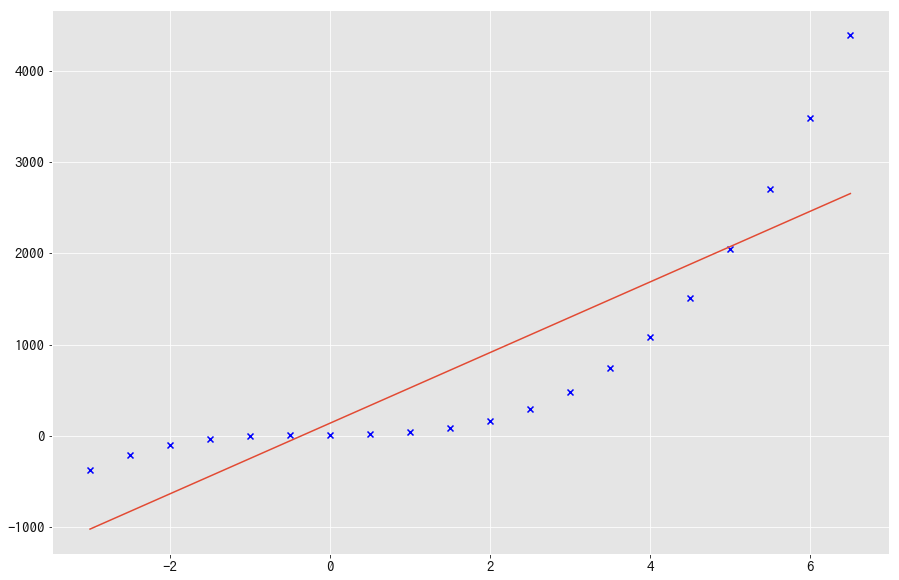

In [26]:
# random seed
rnd = np.random.RandomState(0)

# x = predictor variables from -3 to 7, by 0.5
x = np.arange(-3,7,0.5)

# y = response variables with noise
t = 15*x**3 + 5*x**2 + 8*x + 12 + rnd.randn(len(x))

# add bias vector to X
b = np.ones(x.size)
X = np.stack((x, b), axis=1)

# w = coef vector
w = np.zeros(X.size)

# make transpose ventor
X_T = X.transpose()

# print(X.shape,X,X_T.shape,X_T,t,w)

# solve!!
# matrix dot product is calced by np.dot()
# inverse matrix is calced by np.linalg.inv()
w = np.dot(np.dot(np.linalg.inv(np.dot(X_T,X)), X_T),t)

print(w)

y_pred = x*w[0]+w[1]

plt.scatter(x,t,label="raw_data",marker="x",color="blue") # variables data
plt.plot(x,y_pred,label="d=1") # 1d equation linear fitting

ちゃんと上のときと同じ係数が算出されている！

では，プロ野球のデータで分析してみる。

`numpy.polyfit`でのフィッティング係数を用いた直線を，プロットする。

#### numpy.correcoef

相関係数$R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} * C_{jj} } }$も算出する。[(ドキュメント)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html)

> *numpy.corrcoef(x, y=None, rowvar=True, bias=_NoValue, ddof = _NoValue)*

model: 0.00048674334817072466x+0.2386875673529277
Correlation coefficient is 0.5145542818333805


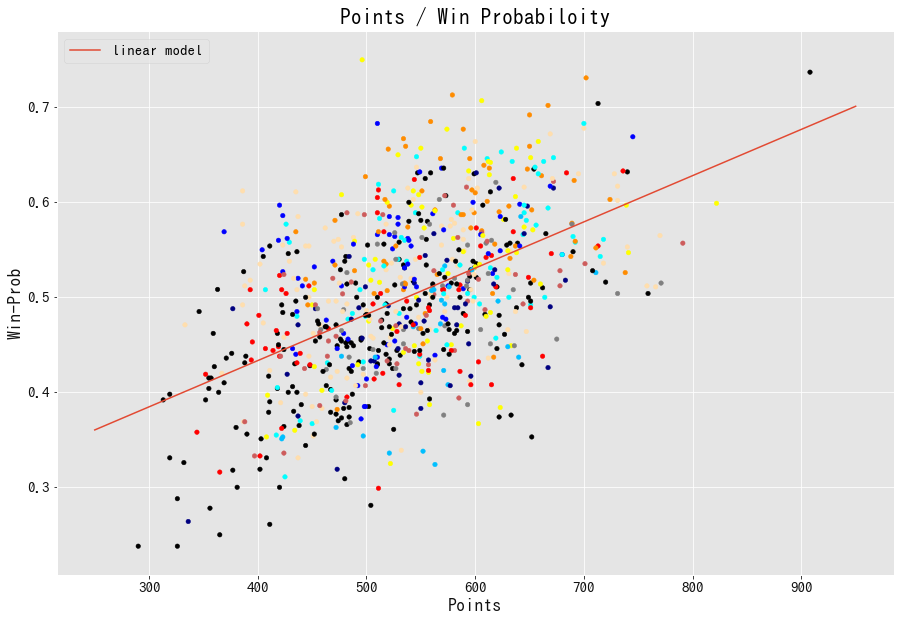

In [27]:
# scatter plot
data_all.plot(title="Points / Win Probabiloity", x="Points", y="Win-Prob"
              ,kind="scatter",grid=1, c=data_all.color)
# np fitting
coef = np.polyfit(data_all.Points,data_all["Win-Prob"], 1) # linear regression
# fitting line plot
plt.plot(np.linspace(250,950,100),np.linspace(250,950,100)*coef[0]+coef[1] ,label="linear model")
# legend
plt.legend(loc="upper left")
# model coefs
print("model: {}x+{}".format(coef[0],coef[1]))
# correlation
print("Correlation coefficient is {}".format(np.corrcoef(data_all.Points,data_all["Win-Prob"])[0,1]))
plt.show()

$$x=Points, y=Win Probability$$
$$y = 0.00048674335x+0.2386875673529277$$

model: 1.9521355259222484x+147.5582484117147
Correlation coefficient is 0.6738009339154378


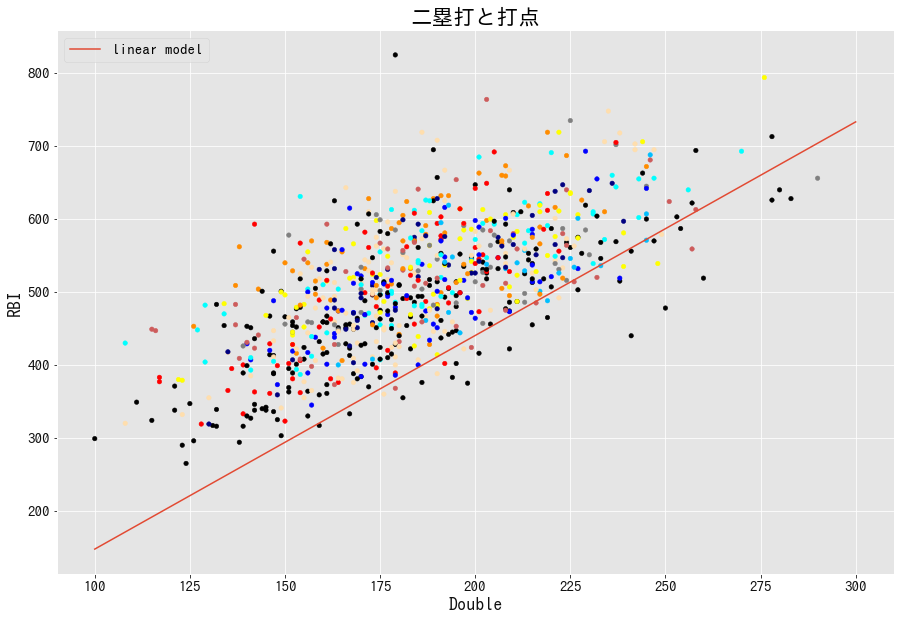

In [28]:
# scatter plot
data_all.plot(title="二塁打と打点", x="Double", y="RBI"
              ,kind="scatter",grid=1, c=data_all.color)
# np fitting
coef = np.polyfit(data_all.Double, data_all.RBI, 1) # linear regression
# fitting line plot
plt.plot(np.linspace(100,300,100),np.linspace(0,300,100)*coef[0]+coef[1] ,label="linear model")
# legend
plt.legend(loc="upper left")
# model coefs
print("model: {}x+{}".format(coef[0],coef[1]))
# correlation
print("Correlation coefficient is {}".format(np.corrcoef(data_all.Double,data_all.RBI)[0,1]))
plt.show()

#### plotlyでもやってみる。[documents](https://plot.ly/python/line-and-scatter/)

```
# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'markers',
    name = 'markers'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'lines',
    name = 'lines'
)

data = [trace0, trace1, trace2]
py.iplot(data, filename='scatter-mode')
```

このように `Scatter()`でオブジェクト(JSON)化してもいいが，直接記述してみる。  


`plotly.offline.iplot(fig)` 

In [29]:
fig = {
    'data': [
  		{
  			'x': data_all.Double, 
        	'y': data_all.RBI, 
        	'text': data_all.Team, 
        	'mode': 'markers',
            "marker":{
                "color": data_all["color"]
            },
        	'name': 'RBI Points'},
        {
        	'x': np.linspace(100,300,100), 
        	'y': np.linspace(0,300,100)*coef[0]+coef[1], 
        	'text': "Linear Model", 
        	'mode': 'lines', 
        	'name': 'Linear Model'}
    ],
    'layout': {
        'xaxis': {'title': 'Double (Two-base hits)'},
        'yaxis': {'title': "RBI"}
    }
}

# IPython notebook
plotly.offline.iplot(fig)

$$x=Points y=RBI$$

$$y = 1.9521355259222484x+147.5582484117147$$

**plotly**，異常に便利である。

---

<span id="sec4"></span>  



## 4. scikit-learnでの多変量解析，変数選択，モデル選択

`sklearn.linear_model.LinearRegression`が線形回帰モデルのモジュール。  

> *class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)*

- `normalize` : T/F 説明変数$X$の標準化をするかどうか。各変数に対し，平均を引きL2ノルムで割り算をする。

- `n_jobs` : 計算に使うジョブ数の指定。-1でCPUをすべて使う。目的変数(n_targets)が2つ以上の時に使うと良いらしい。

#### 関数群


- `fit(X, y[, sample_weight])`	Fit linear model. フィッティング後にフィッティングモデルのインスタンスを返す。`sample_weight`へリストを渡して，各変数への重みを指定できる。


- `get_params([deep])`	Get parameters for this estimator. パラメータのマッピングを返す。


- `predict(X)`	Predict using the linear model 回帰(予測)をする。与えられた説明変数に対し，予想した値を返す。listを投げてlistが返る感じ。


- `score(X, y[, sample_weight])`	Returns the coefficient of determination R^2 of the prediction. R2乗決定係数を返す。(float)


- `set_params(**params)`	Set the parameters of this estimator. 


[ドキュメンテーション](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

---

### 重回帰分析 (最小二乗法)

#### データの正規化/標準化

各データによって，割合・確率($0<x<1$)だったり，カウントデータ($0<x$)だったりしてスケールがバラバラなので，各データ毎の平均や標準偏差などの統計量を用いて変形する。

- `MinMaxScaler.MinMaxScaler().fit_transform()`  

**正規化** $x(i)_{norm}=\frac{x(i)−xmin}{xmax−xmin}$する


- `StandardScaler.StandardScaler().fit_transform()`

**標準化** $x(i)_{std}=\frac{x(i)−μ}{σ}$ する。


ここでの`fit_transform()`は，`fit()`により各データに対する統計量を計算し，`transform()`でそれを用いてデータそのものを変形して返すということを意味している。

---

`ploting`でのプロットでは，標準化により値が派手なことになっているので$y$軸をログとっている。

In [30]:
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error as mse

# model
model = LinearRegression(normalize=True)

use_columns = ['Batting-Average', 
           'Bats', 'Points', 'Hits', 'Singles',
           'Double', 'Triple', 'HR', 'RBI', 'Steal', 
           'Protection-Ratio','Whole-Pitch', 
           'Strike-Outs', 'Lost-Points']

# normalize X var data (include various scale data)
X = data_all[use_columns]
X_norm = pd.DataFrame(StandardScaler().fit_transform(X))
Y = data_all["Win-Prob"]

# fitting
model.fit(X_norm,Y)

# intercept
print("intercept : {}".format(model.intercept_))

# coefficients
model_coefs = pd.DataFrame()
model_coefs["X_Name"] = pd.Series(use_columns)
model_coefs["coefficient"] = pd.Series(model.coef_)
display(model_coefs.sort_values(["coefficient"]))

# plotting

fig = {
    'data': [
  		{
  			'x': model_coefs.X_Name, 
        	'y': model_coefs.coefficient, 
        	'text': model_coefs.coefficient, 
        	'mode': 'markers',
        	'name': ''},
    ],
    'layout': {
        'xaxis': {'title': 'Variables'},
        'yaxis': {'title': "Coefficients",'type':'log'}
    }
}

# IPython notebook
plotly.offline.iplot(fig)

# check standardizedc X data
#X_norm

intercept : 0.5000125150421181


,X_Name,coefficient
13,Lost-Points,-0.043972
4,Singles,-0.035591
3,Hits,-0.033816
10,Protection-Ratio,-0.026593
5,Double,-0.015691
8,RBI,-0.013363
7,HR,-0.013032
6,Triple,-0.004639
11,Whole-Pitch,0.001263
9,Steal,0.001428


### 赤池情報量基準によるモデルの選択とステップワイズ法

---

<span id="sec5"></span>  



## 5. GLM(一般化線形モデルによる回帰)，正則化，Ridge/Lasso/erastic netによる勝率予想

- [sklearn.linear_model: Generalized Linear Models
](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)


- カテゴリやカウントデータは適していない(0以下にならないデータに対して正規分布の尤度を見るのはおかしい?)


- リンク関数

- 分布の選択

- データの**標準化**

### Ridge回帰 (L2ノルム正則化)

- 係数の比較

- Log Lambda/Coefficients のプロット
- Log Lambda/MSE のプロット

- CV(交差検証)によるハイパーパラメータLambdaの選択

---

#### `sklearn.linear_model.Ridge` [ドキュメンテーション](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

> class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None)

Ridge = Linear least squares with l2 regularization. (Tikhonov regularization)

$\frac{1}{2}N||y - Xw||^2_2 + alpha * ||w||_2$  

##### Examples

```
>>> from sklearn.linear_model import Ridge
>>> import numpy as np
>>> n_samples, n_features = 10, 5
>>> np.random.seed(0)
>>> y = np.random.randn(n_samples)
>>> X = np.random.randn(n_samples, n_features)
>>> clf = Ridge(alpha=1.0)
>>> clf.fit(X, y) 
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
```

##### Methods

- `fit(X, y[, sample_weight])`	Fit Ridge regression model
- `get_params([deep])`	Get parameters for this estimator.
- `predict(X)`	Predict using the linear model
- `score(X, y[, sample_weight])`	Returns the coefficient of determination R^2 of the prediction.
- `set_params(**params)`	Set the parameters of this estimator.

---

#### `sklearn.linear_model.RidgeCV` [ドキュメンテーション](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV)

> *class **sklearn.linear_model.RidgeCV**(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)*

##### methods

- `fit(X, y[, sample_weight])`	Fit Ridge regression model
- `get_params([deep])`	Get parameters for this estimator.
- `predict(X)`	Predict using the linear model
- `score(X, y[, sample_weight])`	Returns the coefficient of determination R^2 of the prediction.
- `set_params(**params)`	Set the parameters of this estimator.

In [31]:
from sklearn.linear_model import Ridge
>>> import numpy as np
>>> n_samples, n_features = 10, 5
>>> np.random.seed(0)
>>> y = np.random.randn(n_samples)
>>> X = np.random.randn(n_samples, n_features)
>>> clf = Ridge(alpha=1.0)
>>> clf.fit(X, y) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### Lasso回帰 (L1ノルム正則化)

- Least Absolute Shrinkage and Selection Operator，スパース性(変数選択)

- Log Lambda/Coefficients のプロット
- Log Lambda/MSE のプロット

- CV(交差検証)によるハイパーパラメータLambdaの選択

---

#### `sklearn.linear_model.Lasso` [ドキュメンテーション](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

> *class sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)*

Lassoの最適化項は，$\frac{1}{2}N||y - Xw||^2_2 + alpha * ||w||_1$  

```
>>> from sklearn import linear_model
>>> clf = linear_model.Lasso(alpha=0.1)
>>> clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
>>> print(clf.coef_)
[ 0.85  0.  ]
>>> print(clf.intercept_)
0.15
```

---

#### `sklearn.linear_model.LassoCV` [ドキュメンテーション](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV)

> *class **sklearn.linear_model.LassoCV**(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute=’auto’, max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1, positive=False, random_state=None, selection=’cyclic’)*

##### methods

- `fit(X, y)`	Fit linear model with coordinate descent
- `get_params([deep])`	Get parameters for this estimator.
- `path(X, y[, eps, n_alphas, alphas, …])`	Compute Lasso path with coordinate descent
- `predict(X)`	Predict using the linear model
- `score(X, y[, sample_weight])`	Returns the coefficient of determination R^2 of the prediction.
- `set_params(**params)`	Set the parameters of this estimator.

---

### Elastic Net (罰金項がL1,L2ノルム線形結合)

---

<span id="sec6"></span>  



## 6. SVM(サポートベクターマシン)による分類(SVC)，交差検証，評価，可視化


### `sklearn.svm.SVC`による分類を行う。

- `decision_function(X)` Distance of the samples X to the separating hyperplane.  
    - 分離する超平面までの距離を算出


- `fit(X, y[, sample_weight])`	Fit the SVM model according to the given training data.
    - フィッティングする。


- `get_params([deep])`	Get parameters for this estimator.
    - 予測モデルの各種パラメータを取得


- `predict(X)`	Perform classification on samples in X.
    - テストデータ(ラベル)に基づいて予測！結果のリストを返す。


- `score(X, y[, sample_weight])`	Returns the mean accuracy on the given test data and labels.
    - 学習ラベルに対しての平均アキュラシーをだす。


- `set_params(**params)`	Set the parameters of this estimator.
    - 予測モデルの各種パラメータを設定。



---

<span id="sec7"></span>  



## 7. ランダムフォレストによる分類，可視化


---


---

<span id="sec8"></span>  



## 8. ニューラルネットワーク (パーセプトロン，MLP，DL)


---


---

<span id="sec9"></span>  



## 9. TensorFlowによる深層学習モデル構築


---
